# Ingest

In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
print(df.columns)
print(df.shape)
df.head()

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')
(44638, 5)


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [21]:
df.tail()


,date,state,fips,cases,deaths
44633,2022-05-18,Virginia,51,1747607,20328
44634,2022-05-18,Washington,53,1547787,12882
44635,2022-05-18,West Virginia,54,507678,6905
44636,2022-05-18,Wisconsin,55,1649621,14514
44637,2022-05-18,Wyoming,56,157409,1820


# EDA

In [22]:
df.describe()

,fips,cases,deaths
count,44638.000000,4.463800e+04,44638.000000
mean,32.136408,5.718416e+05,8964.691429
std,18.741869,9.888938e+05,14023.033770
min,1.000000,1.000000e+00,0.000000
25%,17.000000,3.758700e+04,667.000000
50%,31.000000,2.085090e+05,3281.000000
75%,46.000000,6.994668e+05,10928.750000
max,78.000000,9.402566e+06,91067.000000


<AxesSubplot:xlabel='cases', ylabel='deaths'>

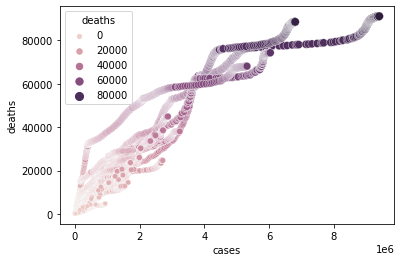

In [23]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

## Date-based EDA

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2022-05-18', '2022-05-18', '2022-05-18', '2022-05-18',
               '2022-05-18', '2022-05-18', '2022-05-18', '2022-05-18',
               '2022-05-18', '2022-05-18'],
              dtype='datetime64[ns]', name='date', length=44638, freq=None)

In [25]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2022-05-19
Two days ago 2022-05-17


In [26]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-05-17,Alabama,1,1306116,19633
2022-05-17,Alaska,2,254467,1228
2022-05-17,American Samoa,60,5938,30
2022-05-17,Arizona,4,2030925,30230
2022-05-17,Arkansas,5,838971,11418


In [27]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2022-05-18,California,6,9402566,91067
2022-05-17,California,6,9398846,91058
2022-05-18,Texas,48,6807050,88477
2022-05-17,Texas,48,6802180,88462
2022-05-18,Florida,12,6039475,74272
2022-05-17,Florida,12,6030141,74241
2022-05-18,New York,36,5320730,68055
2022-05-17,New York,36,5309983,68033
2022-05-18,Pennsylvania,42,2877660,44898


## state based analysis

In [28]:
top_ten_states = list(current_df["state"].head(10).values)
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")
top_ten_states

['California',
 'California',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'New York',
 'New York',
 'Pennsylvania',
 'Pennsylvania']

<Figure size 1080x360 with 0 Axes>

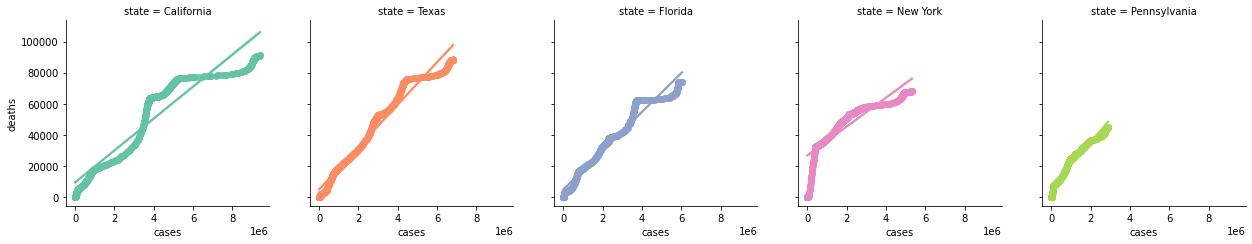

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)


In [30]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Pennsylvania,6,0
2020-03-09,Pennsylvania,10,0
2020-03-10,Pennsylvania,12,0
2020-03-11,Pennsylvania,16,0
2020-03-12,Pennsylvania,22,0


# Modeling; placeholder


In [32]:
# ## - Things to keep in mind ##
# - This is where the modeling code lives as this repeatability can be critical since the MLOps pipeline may need to reference how the model creation occcured
# - 

# Conclusion; placeholder

- Should be a summary for a business leader making the decision